In [1]:
from numpy import *
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from numpy import linalg as la
import pdb
%matplotlib inline

## Problem 1
#### Section a)
Load in the joke ratings data and the joke text data into appropriate data structures

In [2]:
pd.set_option('display.max_colwidth', 120)
jokes = pd.read_csv("C:/Users/USER/Desktop/DSC/DSC_478 Programming to Machine Learning A/Assignment/Assignment_4/Problem_2/jokes.csv", usecols=[1], header=None)
jokes.head(10)

,1
0,"A man visits the doctor. The doctor says ""I have bad news for you.You have cancer and Alzheimer's disease"". The man ..."
1,This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing....
2,Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert.
3,Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.
4,Q. What's O. J. Simpson's Internet address? A.\tSlash slash backslash slash slash escape.
5,Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the...
6,How many feminists does it take to screw in a light bulb?That's not funny.
7,Q. Did you hear about the dyslexic devil worshipper? A. He sold his soul to Santa.
8,A country guy goes into a city bar that has a dress code and the maitred' demands he wear a tie. Discouraged the guy...
9,"Two cannibals are eating a clown one turns to other and says: ""Does this taste funny to you?"


In [3]:
def get_joke_text(jokes, id):
	return np.array(jokes)[id]

In [4]:
print(get_joke_text(jokes, 99))

["Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen."]


In [11]:
dataMat = pd.read_csv("C:/Users/USER/Desktop/DSC/DSC_478 Programming to Machine Learning A/Assignment/Assignment_4/Problem_2/modified_jester_data.csv", header=None)
data = dataMat.copy()
dataMat.shape

(1000, 100)

In [6]:
pd.set_option('display.max_colwidth', 40)

dataMat.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
5,4.83,7.46,11.44,2.50,3.91,6.68,2.31,10.13,4.35,9.20,...,7.46,4.11,10.32,8.04,8.82,7.65,11.05,1.92,5.95,7.55
6,0.00,0.00,0.00,0.00,19.59,1.15,18.72,19.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.00,0.00,0.00
7,17.84,14.16,20.17,4.79,2.84,9.30,20.27,12.41,5.81,6.58,...,18.23,9.88,10.90,5.32,7.84,7.65,13.14,10.95,12.31,11.00
8,7.21,7.46,1.58,4.11,2.26,10.71,5.71,2.07,3.14,9.40,...,15.37,10.71,15.17,10.71,10.71,10.71,10.71,10.71,7.60,6.05
9,14.01,16.15,16.15,14.01,17.41,16.15,19.93,13.52,14.01,19.16,...,0.00,15.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Euclidean distance method

In [5]:
def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

Pearson similarity method

In [6]:
def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

Cosine distance method

In [25]:
def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

Rating prediction function "standEst"

In [10]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

"svdEst" as the prediction engine

In [11]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

Recommend function to provide top N joke recommendations

In [12]:
def recommend(dataMat, user, N=3, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [12]:
data = np.mat(dataMat)

Top 5 recommendations for User 6

standEst method

In [14]:
user = 6
recommendations = recommend(data, user, N=5, simMeas=pearsonSim, estMethod=standEst)
print(recommendations)

[(62, 15.588668258557378), (86, 15.579343422233135), (69, 15.57500130364504), (75, 15.571881942976974), (0, 15.569190760683496)]


In [15]:
print("Recommended Items for User", user, ":\n")
for i, p in recommendations:
    print("Joke ", jokes.loc[[i]], "with predicted rating: ", p, "\n")

Recommended Items for User 6 :

Joke                                            1
62  An engineer a physicist and a mathem... with predicted rating:  15.588668258557378 

Joke                                            1
86  A man recently completing a routine ... with predicted rating:  15.579343422233135 

Joke                                            1
69  Employer to applicant: "In this job ... with predicted rating:  15.57500130364504 

Joke                                            1
75  There once was a man and a woman tha... with predicted rating:  15.571881942976974 

Joke                                           1
0  A man visits the doctor. The doctor ... with predicted rating:  15.569190760683496 



Top 5 recommendations for User 6

svdEst method

In [16]:
user = 6
recommendations = recommend(data, user, N=5, simMeas=pearsonSim, estMethod=svdEst)
print(recommendations)

[(41, 15.660098037951533), (46, 15.541185929914171), (70, 15.527920319648064), (77, 15.525807751313641), (88, 15.522564020079455)]


In [17]:
print("Recommended Items for User", user, ":\n")
for i, p in recommendations:
    print("Joke ", jokes.loc[[i]], "with predicted rating: ", p, "\n")

Recommended Items for User 6 :

Joke                                            1
41  Two men are discussing the age old q... with predicted rating:  15.660098037951533 

Joke                                            1
46  There was an engineer who had an exc... with predicted rating:  15.541185929914171 

Joke                                            1
70  At a recent Sacramento PC Users Grou... with predicted rating:  15.527920319648064 

Joke                                            1
77  Q: What's the difference between the... with predicted rating:  15.525807751313641 

Joke                                            1
88  A radio conversation of a US naval s... with predicted rating:  15.522564020079455 



Top 5 recommendations for User 10

standEst method

In [18]:
user = 10
recommendations = recommend(data, user, N=5, simMeas=pearsonSim, estMethod=standEst)
print(recommendations)

[(71, 15.001861407344624), (25, 15.00122961286275), (53, 14.996450045612539), (41, 14.991542059358627), (64, 14.98131102986461)]


In [19]:
print("Recommended Items for User", user, ":\n")
for i, p in recommendations:
    print("Joke ", jokes.loc[[i]], "with predicted rating: ", p, "\n")

Recommended Items for User 10 :

Joke                                            1
71  On the first day of college the Dean... with predicted rating:  15.001861407344624 

Joke                                            1
25  A guy walks into a bar and sits down... with predicted rating:  15.00122961286275 

Joke                                            1
53  The Pope dies and naturally goes to ... with predicted rating:  14.996450045612539 

Joke                                            1
41  Two men are discussing the age old q... with predicted rating:  14.991542059358627 

Joke                                            1
64  Two Rednecks were seated at the end ... with predicted rating:  14.98131102986461 



Top 5 recommendations for User 10

svdEst method

In [20]:
user = 10
recommendations = recommend(data, user, N=5, simMeas=pearsonSim, estMethod=svdEst)
print(recommendations)

[(51, 15.407899982647054), (13, 15.394990742479857), (11, 15.392744326393046), (38, 15.388365440049204), (5, 15.38214164969971)]


In [21]:
print("Recommended Items for User", user, ":\n")
for i, p in recommendations:
    print("Joke ", jokes.loc[[i]], "with predicted rating: ", p, "\n")

Recommended Items for User 10 :

Joke                                            1
51  Q: What do Monica Lewinsky and Bob D... with predicted rating:  15.407899982647054 

Joke                                            1
13  The father was very anxious to marry... with predicted rating:  15.394990742479857 

Joke                                            1
11  A guy stood over his tee shot for wh... with predicted rating:  15.392744326393046 

Joke                                            1
38  What is the difference between men a... with predicted rating:  15.388365440049204 

Joke                                           1
5  Bill & Hillary are on a trip back to... with predicted rating:  15.38214164969971 



#### Section b)
MAE results

In [22]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
	dataMat = np.array(dataMat)
	number_of_items = np.shape(dataMat)[1]
	rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
	test_size = int(test_ratio * len(rated_items_by_user))
	test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
	withheld_items = rated_items_by_user[test_indices]
	original_user_profile = np.copy(dataMat[user])
	dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
	error_u = 0.0
	count_u = len(withheld_items)

	# Compute absolute error for user u over all test items
	for item in withheld_items:
		# Estimate rating on the withheld item
		estimatedScore = estMethod(dataMat, user, simMeas, item)
		error_u = error_u + abs(estimatedScore - original_user_profile[item])	
	
	# Now restore ratings of the withheld items to the user profile
	for item in withheld_items:
		dataMat[user, item] = original_user_profile[item]
		
	# Return sum of absolute errors and the count of test cases for this user
	# Note that these will have to be accumulated for each user to compute MAE
	return error_u, count_u

Test function that loops thru each user calculating the error.

In [23]:
def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    M = dataMat.shape[0]
    #N = dataMat.shape[1]
    #Ratings = np.array(dataMat)
    totCount = 0
    totError = 0
    for i in range(M):
        err_u, rateCount_u = cross_validate_user(dataMat, i, test_ratio, estMethod, simMeas=pearsonSim)
        totCount += rateCount_u
        totError += err_u
        print("Mean Absolute Error for User %d = %0.3f" %(i, err_u/rateCount_u))
    return (totError/totCount)

MAE results using the rating prediction function "standEst"

In [24]:
MAE_standEst = test(dataMat, 0.2, standEst, pearsonSim)

Mean Absolute Error for User 0 = 5.659
Mean Absolute Error for User 1 = 3.737
Mean Absolute Error for User 2 = 2.093
Mean Absolute Error for User 3 = 5.789
Mean Absolute Error for User 4 = 3.342
Mean Absolute Error for User 5 = 2.060
Mean Absolute Error for User 6 = 2.657
Mean Absolute Error for User 7 = 5.741
Mean Absolute Error for User 8 = 3.004
Mean Absolute Error for User 9 = 2.688
Mean Absolute Error for User 10 = 3.753
Mean Absolute Error for User 11 = 2.971
Mean Absolute Error for User 12 = 1.910
Mean Absolute Error for User 13 = 5.258
Mean Absolute Error for User 14 = 3.811
Mean Absolute Error for User 15 = 3.136
Mean Absolute Error for User 16 = 4.336
Mean Absolute Error for User 17 = 2.190
Mean Absolute Error for User 18 = 1.099
Mean Absolute Error for User 19 = 4.733
Mean Absolute Error for User 20 = 1.362
Mean Absolute Error for User 21 = 2.742
Mean Absolute Error for User 22 = 3.660
Mean Absolute Error for User 23 = 4.349
Mean Absolute Error for User 24 = 3.926
Mean Absol

Mean Absolute Error for User 203 = 2.455
Mean Absolute Error for User 204 = 4.594
Mean Absolute Error for User 205 = 4.554
Mean Absolute Error for User 206 = 6.163
Mean Absolute Error for User 207 = 2.459
Mean Absolute Error for User 208 = 2.366
Mean Absolute Error for User 209 = 2.940
Mean Absolute Error for User 210 = 3.694
Mean Absolute Error for User 211 = 4.970
Mean Absolute Error for User 212 = 5.671
Mean Absolute Error for User 213 = 3.684
Mean Absolute Error for User 214 = 3.371
Mean Absolute Error for User 215 = 2.039
Mean Absolute Error for User 216 = 3.011
Mean Absolute Error for User 217 = 4.056
Mean Absolute Error for User 218 = 4.917
Mean Absolute Error for User 219 = 3.799
Mean Absolute Error for User 220 = 4.151
Mean Absolute Error for User 221 = 1.835
Mean Absolute Error for User 222 = 4.281
Mean Absolute Error for User 223 = 1.288
Mean Absolute Error for User 224 = 1.282
Mean Absolute Error for User 225 = 6.429
Mean Absolute Error for User 226 = 2.615
Mean Absolute Er

Mean Absolute Error for User 403 = 2.420
Mean Absolute Error for User 404 = 1.515
Mean Absolute Error for User 405 = 4.322
Mean Absolute Error for User 406 = 6.752
Mean Absolute Error for User 407 = 3.783
Mean Absolute Error for User 408 = 2.116
Mean Absolute Error for User 409 = 4.997
Mean Absolute Error for User 410 = 3.839
Mean Absolute Error for User 411 = 3.876
Mean Absolute Error for User 412 = 1.292
Mean Absolute Error for User 413 = 4.714
Mean Absolute Error for User 414 = 2.350
Mean Absolute Error for User 415 = 3.429
Mean Absolute Error for User 416 = 4.764
Mean Absolute Error for User 417 = 2.662
Mean Absolute Error for User 418 = 3.376
Mean Absolute Error for User 419 = 4.574
Mean Absolute Error for User 420 = 3.092
Mean Absolute Error for User 421 = 1.372
Mean Absolute Error for User 422 = 3.320
Mean Absolute Error for User 423 = 4.962
Mean Absolute Error for User 424 = 2.735
Mean Absolute Error for User 425 = 4.782
Mean Absolute Error for User 426 = 5.014
Mean Absolute Er

Mean Absolute Error for User 604 = 5.732
Mean Absolute Error for User 605 = 2.957
Mean Absolute Error for User 606 = 2.154
Mean Absolute Error for User 607 = 4.266
Mean Absolute Error for User 608 = 1.730
Mean Absolute Error for User 609 = 1.669
Mean Absolute Error for User 610 = 1.391
Mean Absolute Error for User 611 = 1.149
Mean Absolute Error for User 612 = 2.610
Mean Absolute Error for User 613 = 4.590
Mean Absolute Error for User 614 = 2.587
Mean Absolute Error for User 615 = 1.937
Mean Absolute Error for User 616 = 5.071
Mean Absolute Error for User 617 = 2.271
Mean Absolute Error for User 618 = 3.776
Mean Absolute Error for User 619 = 2.276
Mean Absolute Error for User 620 = 2.364
Mean Absolute Error for User 621 = 2.932
Mean Absolute Error for User 622 = 3.812
Mean Absolute Error for User 623 = 3.236
Mean Absolute Error for User 624 = 2.081
Mean Absolute Error for User 625 = 4.377
Mean Absolute Error for User 626 = 5.405
Mean Absolute Error for User 627 = 2.399
Mean Absolute Er

Mean Absolute Error for User 805 = 4.089
Mean Absolute Error for User 806 = 4.886
Mean Absolute Error for User 807 = 2.995
Mean Absolute Error for User 808 = 3.027
Mean Absolute Error for User 809 = 2.722
Mean Absolute Error for User 810 = 4.538
Mean Absolute Error for User 811 = 3.573
Mean Absolute Error for User 812 = 5.430
Mean Absolute Error for User 813 = 3.861
Mean Absolute Error for User 814 = 1.564
Mean Absolute Error for User 815 = 2.933
Mean Absolute Error for User 816 = 4.324
Mean Absolute Error for User 817 = 3.286
Mean Absolute Error for User 818 = 4.364
Mean Absolute Error for User 819 = 6.358
Mean Absolute Error for User 820 = 2.150
Mean Absolute Error for User 821 = 2.334
Mean Absolute Error for User 822 = 3.350
Mean Absolute Error for User 823 = 1.942
Mean Absolute Error for User 824 = 3.789
Mean Absolute Error for User 825 = 4.908
Mean Absolute Error for User 826 = 4.585
Mean Absolute Error for User 827 = 4.046
Mean Absolute Error for User 828 = 3.676
Mean Absolute Er

In [25]:
print("Overall Mean Absolute Error 'standEst':")
print(MAE_standEst)

Overall Mean Absolute Error 'standEst':
3.723438882961513


MAE results using the rating prediction function "svdEst"

In [26]:
MAE_svdEst = test(dataMat, 0.2, svdEst, pearsonSim)

Mean Absolute Error for User 0 = 4.185
Mean Absolute Error for User 1 = 4.160
Mean Absolute Error for User 2 = 0.665
Mean Absolute Error for User 3 = 4.365
Mean Absolute Error for User 4 = 3.543
Mean Absolute Error for User 5 = 2.289
Mean Absolute Error for User 6 = 2.710
Mean Absolute Error for User 7 = 4.465
Mean Absolute Error for User 8 = 2.750
Mean Absolute Error for User 9 = 2.262
Mean Absolute Error for User 10 = 4.050
Mean Absolute Error for User 11 = 2.665
Mean Absolute Error for User 12 = 2.040
Mean Absolute Error for User 13 = 4.827
Mean Absolute Error for User 14 = 5.303
Mean Absolute Error for User 15 = 2.778
Mean Absolute Error for User 16 = 4.056
Mean Absolute Error for User 17 = 2.257
Mean Absolute Error for User 18 = 3.274
Mean Absolute Error for User 19 = 3.761
Mean Absolute Error for User 20 = 2.119
Mean Absolute Error for User 21 = 3.154
Mean Absolute Error for User 22 = 3.093
Mean Absolute Error for User 23 = 3.709
Mean Absolute Error for User 24 = 3.015
Mean Absol

Mean Absolute Error for User 203 = 2.699
Mean Absolute Error for User 204 = 5.231
Mean Absolute Error for User 205 = 1.929
Mean Absolute Error for User 206 = 5.381
Mean Absolute Error for User 207 = 1.937
Mean Absolute Error for User 208 = 4.080
Mean Absolute Error for User 209 = 1.871
Mean Absolute Error for User 210 = 4.629
Mean Absolute Error for User 211 = 5.357
Mean Absolute Error for User 212 = 4.192
Mean Absolute Error for User 213 = 2.557
Mean Absolute Error for User 214 = 5.959
Mean Absolute Error for User 215 = 1.356
Mean Absolute Error for User 216 = 2.747
Mean Absolute Error for User 217 = 3.537
Mean Absolute Error for User 218 = 4.348
Mean Absolute Error for User 219 = 2.471
Mean Absolute Error for User 220 = 4.290
Mean Absolute Error for User 221 = 1.973
Mean Absolute Error for User 222 = 4.651
Mean Absolute Error for User 223 = 0.958
Mean Absolute Error for User 224 = 1.433
Mean Absolute Error for User 225 = 5.670
Mean Absolute Error for User 226 = 2.848
Mean Absolute Er

Mean Absolute Error for User 403 = 2.683
Mean Absolute Error for User 404 = 1.132
Mean Absolute Error for User 405 = 6.042
Mean Absolute Error for User 406 = 6.292
Mean Absolute Error for User 407 = 3.034
Mean Absolute Error for User 408 = 2.232
Mean Absolute Error for User 409 = 2.951
Mean Absolute Error for User 410 = 3.266
Mean Absolute Error for User 411 = 3.355
Mean Absolute Error for User 412 = 1.003
Mean Absolute Error for User 413 = 3.772
Mean Absolute Error for User 414 = 2.319
Mean Absolute Error for User 415 = 5.062
Mean Absolute Error for User 416 = 3.419
Mean Absolute Error for User 417 = 5.768
Mean Absolute Error for User 418 = 2.602
Mean Absolute Error for User 419 = 5.471
Mean Absolute Error for User 420 = 2.334
Mean Absolute Error for User 421 = 1.671
Mean Absolute Error for User 422 = 2.823
Mean Absolute Error for User 423 = 4.794
Mean Absolute Error for User 424 = 2.889
Mean Absolute Error for User 425 = 3.716
Mean Absolute Error for User 426 = 2.662
Mean Absolute Er

Mean Absolute Error for User 603 = 4.814
Mean Absolute Error for User 604 = 2.649
Mean Absolute Error for User 605 = 3.579
Mean Absolute Error for User 606 = 1.535
Mean Absolute Error for User 607 = 3.147
Mean Absolute Error for User 608 = 1.830
Mean Absolute Error for User 609 = 0.644
Mean Absolute Error for User 610 = 1.635
Mean Absolute Error for User 611 = 1.507
Mean Absolute Error for User 612 = 2.702
Mean Absolute Error for User 613 = 3.920
Mean Absolute Error for User 614 = 1.699
Mean Absolute Error for User 615 = 2.546
Mean Absolute Error for User 616 = 4.143
Mean Absolute Error for User 617 = 3.847
Mean Absolute Error for User 618 = 2.333
Mean Absolute Error for User 619 = 2.988
Mean Absolute Error for User 620 = 1.656
Mean Absolute Error for User 621 = 3.679
Mean Absolute Error for User 622 = 4.863
Mean Absolute Error for User 623 = 4.329
Mean Absolute Error for User 624 = 2.804
Mean Absolute Error for User 625 = 4.738
Mean Absolute Error for User 626 = 4.318
Mean Absolute Er

Mean Absolute Error for User 803 = 4.422
Mean Absolute Error for User 804 = 0.965
Mean Absolute Error for User 805 = 3.962
Mean Absolute Error for User 806 = 5.082
Mean Absolute Error for User 807 = 2.842
Mean Absolute Error for User 808 = 3.846
Mean Absolute Error for User 809 = 3.100
Mean Absolute Error for User 810 = 3.966
Mean Absolute Error for User 811 = 3.905
Mean Absolute Error for User 812 = 5.249
Mean Absolute Error for User 813 = 3.896
Mean Absolute Error for User 814 = 1.746
Mean Absolute Error for User 815 = 3.097
Mean Absolute Error for User 816 = 5.630
Mean Absolute Error for User 817 = 2.293
Mean Absolute Error for User 818 = 4.871
Mean Absolute Error for User 819 = 6.447
Mean Absolute Error for User 820 = 1.488
Mean Absolute Error for User 821 = 2.241
Mean Absolute Error for User 822 = 2.818
Mean Absolute Error for User 823 = 1.230
Mean Absolute Error for User 824 = 3.191
Mean Absolute Error for User 825 = 4.461
Mean Absolute Error for User 826 = 5.558
Mean Absolute Er

In [27]:
print("Overall Mean Absolute Error 'svdEst':")
print(MAE_svdEst)

Overall Mean Absolute Error 'svdEst':
3.617934255002233


Following is the MAE value while looping thru all the users using the svdEst method with pearsonSim distance. The value is slightly lower compared to standEst with pearsonSim distance.

MAE value is 3.6 with svdEst method.

MAE value is 3.7 with standEst method.

#### Section c)
New function "print_most_similar_jokes"

In [16]:
def load_jokes(file):
    jokes = np.genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes

In [22]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
    M = dataMat.shape[1]
    itemScores = []
    for item in range(M):
        similarity = metric(dataMat[queryJoke,:].T, dataMat[item,:].T)
        itemScores.append((item, similarity))
    recommendations = sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:k+1]
    print('Example output for "print_most_similar_jokes"\n')
    print('Selected joke: ')
    print(jokes[queryJoke],"\n")
    print('Top 5 Recommended jokes are :\n')
    for i, p in recommendations:
        if i != queryJoke:
            print(jokes[i],"\n")
            print('-------------------')
    

In [17]:
jokes_sim = load_jokes('C:/Users/USER/Desktop/DSC/DSC_478 Programming to Machine Learning A/Assignment/Assignment_4/Problem_2/jokes.csv')
print_most_similar_jokes(data,jokes_sim,99,5,metric=pearsonSim)

Example output for "print_most_similar_jokes"

Selected joke: 
Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 

Top 5 Recommended jokes are :

Two men are discussing the age old question: who enjoys sex more the man or the woman?  A woman walks by and listens in for awhile and then interrupts: "Listen you guys. You know when your ear itches and you put in your little finger and wiggle it around for awhile?  Afterward which feels better your finger or your ear?" 

-------------------
Out in the backwoods of some midwestern state little Johnny arrives at school an hour late.Teacher: "Why are you so late John? "Johny : "My big brother got shot in the ass."(the teacher corrects his speech)Teacher: "Rectum."Johnny : "Wrecked him!? Hell It damn near killed him!" 

-------------------
Q: How many Presidents does it take to screw in a light bulb?A: It depends upon your definition of screw

In [23]:
print_most_similar_jokes(data,jokes_sim,56,5,metric=pearsonSim)

Example output for "print_most_similar_jokes"

Selected joke: 
Why are there so many Jones's in the phone book?Because they all have phones. 

Top 5 Recommended jokes are :

81 Q: How do you keep a computer programmer in the shower all day long?A: Give them a shampoo with a label that says"rinse lather repeat". 

-------------------
19 What's the difference between a MacIntosh and anEtch-A-Sketch? You don't have to shake the Mac to clear the screen. 

-------------------
33 Out in the backwoods of some midwestern state little Johnny arrives at school an hour late.Teacher: "Why are you so late John? "Johny : "My big brother got shot in the ass."(the teacher corrects his speech)Teacher: "Rectum."Johnny : "Wrecked him!? Hell It damn near killed him!" 

-------------------
99 Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 

-------------------
62 An engineer a physicist and a mathemat

The above cell prints the 5 most similar jokes for joke 99. The process uses pearsonSim as the metric method.

In [31]:
print_most_similar_jokes(data,jokes_sim,34,5,metric=euclidSim)

Example output for "print_most_similar_jokes"

Selected joke: 
An explorer in the deepest Amazon suddenly finds himself surrounded by a bloodthirsty group of natives. Upon surveying the situation he says quietly to himself "Oh God I'm screwed." The sky darkens and a voice booms out "No you are NOTscrewed. Pick up that stone at your feet and bash in the head of the chief standing in front of you." So with the stone he bashes the life out of the chief. Standing above the lifeless body breathing heavily looking at 100 angry natives... The voice booms out again "Okay ..... NOW you're screwed." 

Top 5 Recommended jokes are :

What is the difference between men and women:A woman wants one man to satisfy her every need.A man wants every woman to satisfy his one need. 

-------------------
A boy comes home from school and tells his mother that he got a part in the school play.  "What part?" the mother asked. "I play a Jewish husband" the boy replied.  "Go back to school and tell your teacher 

The above cell prints the 5 most similar jokes for joke 34. The process uses euclidSim as the metric method.

In [26]:
print_most_similar_jokes(data,jokes_sim,56,5,metric=cosineSim)

Example output for "print_most_similar_jokes"

Selected joke: 
Why are there so many Jones's in the phone book?Because they all have phones. 

Top 5 Recommended jokes are :

38 What is the difference between men and women:A woman wants one man to satisfy her every need.A man wants every woman to satisfy his one need. 

-------------------
98 A bus station is where a bus stops.A train station is where a train stops.On my desk I have a work station... 

-------------------
34 An explorer in the deepest Amazon suddenly finds himself surrounded by a bloodthirsty group of natives. Upon surveying the situation he says quietly to himself "Oh God I'm screwed." The sky darkens and a voice booms out "No you are NOTscrewed. Pick up that stone at your feet and bash in the head of the chief standing in front of you." So with the stone he bashes the life out of the chief. Standing above the lifeless body breathing heavily looking at 100 angry natives... The voice booms out again "Okay ..... NOW you'

The above cell prints the 5 most similar jokes for joke 67. The process uses cosineSim as the metric method.

#### Section d)
Develop your own item-based collaborative filtering recommender.

The process creates an item item similarity matrix using any method.

In [33]:
def item_item_matrix (dataMat,metric):
    M = dataMat.shape[1]
    itemScores = np.empty((M, M), dtype=float)
    for i in range(M):
        for j in range(M):
            similarity = metric(dataMat[i,:].T, dataMat[j,:].T)
            itemScores[i][j] = similarity
    return itemScores
    

In [34]:
item = item_item_matrix(data,pearsonSim)
print(item)

[[1.         0.39065625 0.70258047 ... 0.67552971 0.55759721 0.70424146]
 [0.39065625 1.         0.38602813 ... 0.36980774 0.41697113 0.40586509]
 [0.70258047 0.38602813 1.         ... 0.72002257 0.5690817  0.76238007]
 ...
 [0.67552971 0.36980774 0.72002257 ... 1.         0.56049598 0.74558532]
 [0.55759721 0.41697113 0.5690817  ... 0.56049598 1.         0.57467011]
 [0.70424146 0.40586509 0.76238007 ... 0.74558532 0.57467011 1.        ]]


The function predicts the value based on item item similairty mtrix and the user ratings.

In [35]:
def pred_user (dataMat, user, item, simData):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0;
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, dataMat[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simData[j,item]
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

The recommend function returns the top k similar jokes.

In [36]:
def pred_recommend (dataMat, user, item, N, simMat):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = pred_user(dataMat, user, item, simMat)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

The process uses different value of k and finds the MAE for each of them.

In [37]:
def pred_cross_validate(dataMat, user, item, simMat ):
    original_user_profile = np.copy(dataMat[user])
    cross_xplot = []
    cross_yplot = []
    for i in range(1, 20, 3):
        error_u = 0.0
        count_u = 0.0
        recommendations = pred_recommend(data, user, item, i, simMat)
        for j, p in recommendations:
            error_u = error_u + abs(p - original_user_profile[j])
            count_u += 1
        cross_yplot.append((error_u/count_u))
        cross_xplot.append(i)
    pl.figure(figsize=(10,6))
    ax = plt.subplot()
    ax = plt.subplot(111)
    pl.xlabel("k most similar items")
    pl.ylabel("Mean absolute error")
    pl.title("Mean absolute error vs. k most similar items")
    pl.plot(cross_xplot,cross_yplot)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


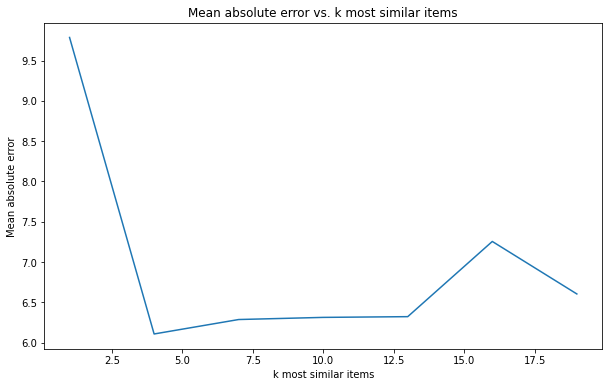

In [38]:
pred_cross_validate(dataMat, 6, 54, item)

We see the value of MAE is minimum when value of k is around 4. MAE value is maximum at k = 1. The value of MAE flattens and increases around k = 15.

In [39]:
user = 6
recommendations = pred_recommend(data, user, 99, 4, item)
print("Recommended Items for User", user, ":\n")
for i, p in recommendations:
    print("Joke ", jokes.loc[[i]], "with predicted rating: ", p, "\n")

Recommended Items for User 6 :

Joke                                            1
23  What do you get when you run over a ... with predicted rating:  15.59613535890096 

Joke                                            1
50  Did you hear that Clinton has announ... with predicted rating:  15.582947428096997 

Joke                                            1
56  Why are there so many Jones's in the... with predicted rating:  15.578294739597926 

Joke                                            1
73  Q: How many stalkers does it take to... with predicted rating:  15.575247121042759 



The above cell returns the 4 most similar jokes for user no 6 and joke no 99.